# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from pathlib import Path

# Study data files
mouse_metadata_path = Path("data/Mouse_metadata.csv")
study_results_path = Path("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = mouse_study_complete['Mouse ID'].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df1 = pd.DataFrame(mouse_study_complete)
duplicated_rows = df1[df1.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicated_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#see above (lD)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_study_clean = df1.drop_duplicates(['Mouse ID', 'Timepoint'], keep=False)
mice_study_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = mice_study_clean['Mouse ID'].nunique()
mice_count_clean

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regime

drug_regimen = mice_study_clean.groupby(["Drug Regimen"]).count()
drug_regimen.head()

mean_tumor_vol_df = mice_study_clean[["Drug Regimen", "Tumor Volume (mm3)"]]
mean_tumor_vol_df = mean_tumor_vol_df.groupby(['Drug Regimen']).mean()
mean_tumor_vol_df.head()

median_tumor_vol_df = mice_study_clean[["Drug Regimen", "Tumor Volume (mm3)"]]
median_tumor_vol_df = median_tumor_vol_df.groupby(['Drug Regimen']).median()
median_tumor_vol_df.head()

tumor_vol_var_df = mice_study_clean[["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_vol_var_df = tumor_vol_var_df.groupby(['Drug Regimen']).var()
tumor_vol_var_df.head()

tumor_vol_std_dev_df = mice_study_clean[['Drug Regimen', 'Tumor Volume (mm3)']]
tumor_vol_std_dev_df = tumor_vol_std_dev_df.groupby(['Drug Regimen']).std()
tumor_vol_std_dev_df.head()

tumor_vol_std_err_df = mice_study_clean[['Drug Regimen', 'Tumor Volume (mm3)']]
tumor_vol_std_err_df = tumor_vol_std_err_df.groupby(['Drug Regimen']).sem()
tumor_vol_std_err_df.head()

summary_columns = {"Drug Regimen":drug_regimen.index,
                    "Mean Tumor Volume": mean_tumor_vol_df["Tumor Volume (mm3)"].values, 
                    "Median Tumor Volume": median_tumor_vol_df["Tumor Volume (mm3)"].values, 
                    "Tumor Volume Variance": tumor_vol_var_df["Tumor Volume (mm3)"].values, 
                    "Tumor Volume Std. Dev.": tumor_vol_std_dev_df["Tumor Volume (mm3)"].values,
                    "Tumor Volume Std. Err.": tumor_vol_std_err_df["Tumor Volume (mm3)"].values}

summary_df = pd.DataFrame(summary_columns)
summary_df = summary_df.set_index("Drug Regimen")
summary_df.head()



# Set the index to be "State" so they will be used as labels
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

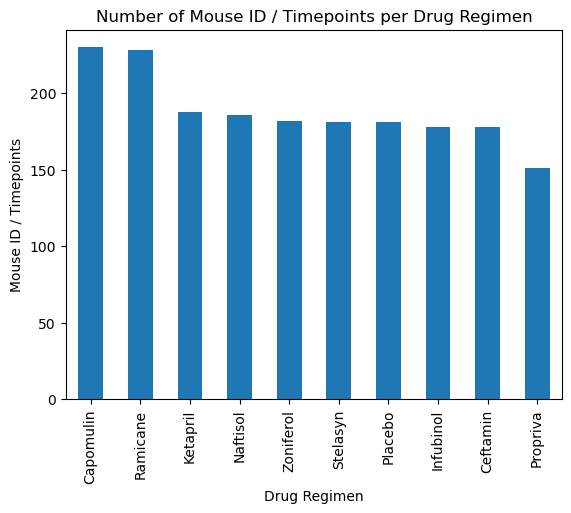

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen = mice_study_clean["Drug Regimen"].value_counts()
drug_regimen.plot(kind="bar")
plt.title("Number of Mouse ID / Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse ID / Timepoints")
plt.show()

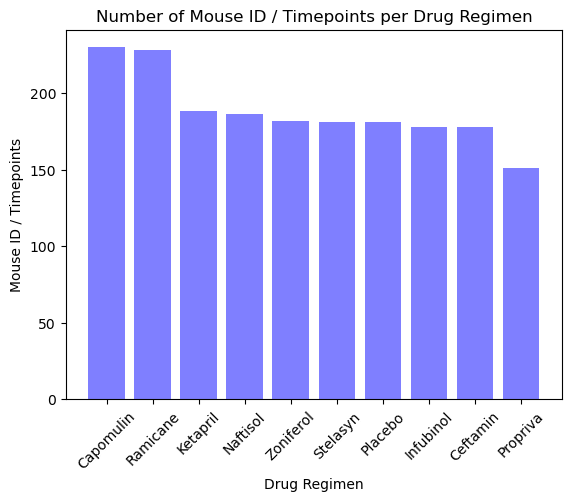

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) 
#for each drug regimen using pyplot.
drug_regimen = mice_study_clean["Drug Regimen"].value_counts()
drug_regimen.values
x_axis = drug_regimen.index
y_axis = drug_regimen.values
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(rotation=45)
plt.title("Number of Mouse ID / Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse ID / Timepoints")
plt.show()

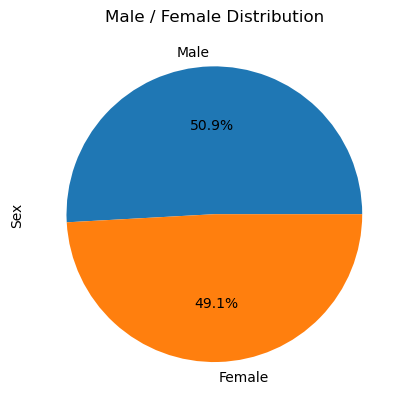

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
distribution_gender = mice_study_clean["Sex"].value_counts()
distribution_gender.plot(kind="pie", autopct='%1.1f%%')
plt.title("Male / Female Distribution")
plt.show()

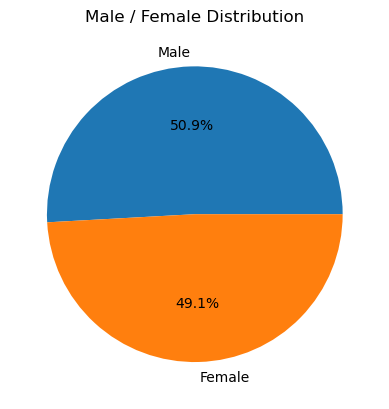

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
distribution_gender = mice_study_clean["Sex"].value_counts()
x_axis = distribution_gender.index
y_axis = distribution_gender.values
plt.pie(y_axis, labels=x_axis, autopct='%1.1f%%')
plt.title("Male / Female Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
regimen_list

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [15]:
# Start by getting the last (greatest) timepoint for each mouse
# tumor_vol_max = mice_study_clean.loc[mice_study_clean['Drug Regimen'].isin('regimens_list')]
tumor_vol_max = mice_study_clean['Drug Regimen'].isin(regimen_list)
tumor_vol_max = mice_study_clean.loc[mice_study_clean['Drug Regimen'].isin(regimen_list)]
tumor_vol_max = tumor_vol_max.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':'max'})
tumor_vol_max.columns = ['Tumor Vol (mm3)_max']
tumor_vol_max = tumor_vol_max.reset_index()
tumor_vol_max

,Drug Regimen,Tumor Vol (mm3)_max
0,Capomulin,48.158209
1,Ceftamin,68.923185
2,Infubinol,72.226731
3,Ramicane,47.622816


In [16]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_max_timepoint = pd.merge(tumor_vol_max, mouse_study_complete, how="left", on=["Drug Regimen", "Drug Regimen"])

# Display the data table for preview
tumor_vol_max_timepoint

,Drug Regimen,Tumor Vol (mm3)_max,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,48.158209,b128,0,45.000000,0,Female,9,22
1,Capomulin,48.158209,j246,0,45.000000,0,Female,21,21
2,Capomulin,48.158209,r554,0,45.000000,0,Female,8,17
3,Capomulin,48.158209,s185,0,45.000000,0,Female,3,17
4,Capomulin,48.158209,b742,0,45.000000,0,Male,7,21
...,...,...,...,...,...,...,...,...,...
809,Ramicane,47.622816,u196,45,40.667713,3,Male,18,25
810,Ramicane,47.622816,g791,45,29.128472,1,Male,11,16
811,Ramicane,47.622816,r811,45,37.225650,1,Male,9,19
812,Ramicane,47.622816,a644,45,32.978522,1,Female,7,17


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
#done above as regimens_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = tumor_vol_max_timepoint[["Drug Regimen", "Tumor Vol (mm3)_max"]]
tumor_vol_data           

,Drug Regimen,Tumor Vol (mm3)_max
0,Capomulin,48.158209
1,Capomulin,48.158209
2,Capomulin,48.158209
3,Capomulin,48.158209
4,Capomulin,48.158209
...,...,...
809,Ramicane,47.622816
810,Ramicane,47.622816
811,Ramicane,47.622816
812,Ramicane,47.622816


In [24]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
  
    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [35]:
# quartiles = tumor_vol_data.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of tumor volume is: {lowerq}")
# print(f"The upper quartile of tumor volume is: {upperq}")
# print(f"The interquartile range of tumor volume is: {iqr}")
# print(f"The the median of tumor volume is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

In [28]:
#tumor_vol_plot is a df sorted to show 4 selected regimen with the range of tumor volumes per each (for plotting)
tumor_vol_plot = mice_study_clean[["Drug Regimen", "Tumor Volume (mm3)"]]

tumor_vol_plot_list = tumor_vol_plot['Drug Regimen'].isin(regimen_list)

tumor_vol_regimen = tumor_vol_plot['Drug Regimen'].loc[tumor_vol_plot_list]
tumor_vol_regimen

0       Capomulin
29      Infubinol
30      Infubinol
31      Infubinol
32      Infubinol
          ...    
1879     Ramicane
1885     Ramicane
1888    Capomulin
1889    Capomulin
1890     Ceftamin
Name: Drug Regimen, Length: 814, dtype: object

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

regimen = regimen_list

for regimen in regimen:
    tumor_vol = mice_study_clean['Tumor Vol (mm3)']
    fig1, ax1 = plt.subplots()
    ax1.set_title('Distribution of the Tumor Volume for Each Treatment Group')
    ax1.set_ylabel('Final Tumor Volume (mm3)')
    ax1.boxplot(regimen)
    plt.show()

KeyError: 'Tumor Vol (mm3)'

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_data = pd.DataFrame({})

# plt.scatter(wdi_data.iloc[:,1],wdi_data.iloc[:,8])
# plt.xlabel('Income Per Capita')
# plt.ylabel('Average Alcohol Consumed Per Person Per Year (L)')
# plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
